## File for creating extent for Temperature data analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#Read in whales data
whale_df = pd.read_csv("data/whales.csv")
#Turn Date into datetime:
whale_df['timestamp'] = pd.to_datetime(whale_df.timestamp)

In [3]:
#only get some columns then we will name them to be easier to reference:
whale_small = whale_df[['timestamp', 'location-long',	'location-lat', 'individual-local-identifier']]
whale_small = whale_small.rename(columns={"timestamp": "time", "location-lat": "lat", "location-long": "long", "individual-local-identifier": "id"})

In [4]:
#get rid of two outliers that are located way inland(no way they can be in a river over there)
whale_small = whale_small[whale_small['long'] < 0]

In [5]:
#Lets just visualize here:

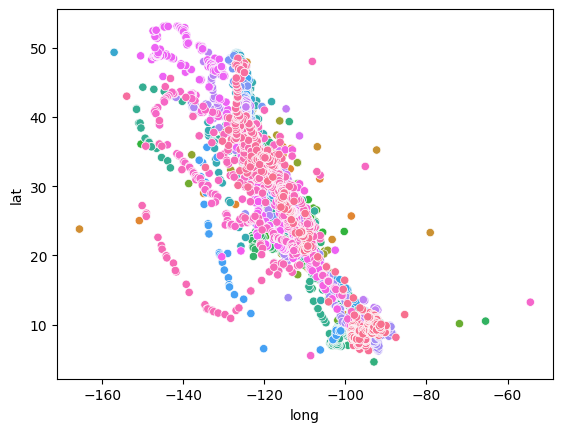

In [6]:
sns.scatterplot(data=whale_small, y="lat", x="long", hue="id", legend=False);

In [7]:
#define range of lat/long for temperature data:
min_long = np.min(whale_small['long'])
min_lat = np.min(whale_small['lat'])
max_lat = np.max(whale_small['lat'])
max_long = np.max(whale_small['long'])

In [8]:
#Export the data
extent = pd.DataFrame({'Type': ['Lat', 'long'], 'min': [min_lat, min_long],
                   'max': [max_lat, max_long]})
extent.to_csv('./exports/extent.csv')  

In [9]:
whale_small.head()

,time,long,lat,id
0,1993-08-29 01:13:00,-122.433,37.058,1993CA-Bmu-00834
1,1993-08-28 18:20:00,-122.412,37.012,1993CA-Bmu-10823
2,1993-08-28 18:54:00,-122.415,37.022,1993CA-Bmu-10833
3,1993-08-31 23:40:00,-122.773,37.198,1993CA-Bmu-10836
4,1994-09-13 21:28:00,-123.102,37.687,1994CA-Bmu-10820


In [10]:
whales_1999 = whale_small[whale_small['time'].year == 1999]
whales_2008 = whale_small['time'].year == 2008]

SyntaxError: unmatched ']' (2421591581.py, line 2)